# Uber Data Analysis🚗 🚕




## About Us

We are a team of dedicated and enthusiastic students who will be conducting a comprehensive data analysis project. Our team comprises:

	•	Abdullah Alfateel (ID: 202037380)
	•	Hashem Almubarak (ID: 2020122260)
	•	Haidar Alnasser (ID: 202027820)


Together, we bring a diverse set of skills in data analysis, software development, and critical thinking to tackle this project. Our goal is to perform a detailed examination of the Uber dataset, exploring its features, structure, and insights, and ultimately provide meaningful conclusions and visualizations. This project will highlight our ability to work collaboratively, interpret data effectively, and present clear, data-driven results.

# Downloading the Dataset

In [ ]:
# Install gdown if not already installed
!pip install -q gdown

# Download the file from the provided link
!gdown "https://drive.google.com/uc?id=1BExtOD6niJEoZc-EnKsTuTlSYwk6BSKf" -O UberDataset.csv

Downloading...
From: https://drive.google.com/uc?id=1BExtOD6niJEoZc-EnKsTuTlSYwk6BSKf
To: /content/UberDataset.csv
100% 87.7k/87.7k [00:00<00:00, 87.7MB/s]


In [ ]:
import pandas as pd

# Load the dataset
data_path = 'UberDataset.csv'
df = pd.read_csv(data_path)

df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Editing dataset

We encountered an issue where we thought there is a row that has missing values,
and we treated it as noise in the dataset.

The purpose of the additional row is to calculate the total miles of all the trips.

In [ ]:
df = df.iloc[:-1]
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


# Part 1: Data Understanding and Exploration

## 1. Dataset Overview
- **What is the source and context of your chosen dataset?**
  - Provide a brief description of the dataset, including its origin and the problem domain it addresses.



The source of the dataset is Uber, a multinational transportation company that connects riders to drivers through a mobile app.

The dataset contains information about some of the rides the company conducted in a specified period, providing data for analysis in the public transportation sector.

Companies could analyze this dataset to know what category to target in order to attract more customers. This could also help them prepare drivers by aknowledging the average distance a ride might take.

## 2. Feature Description
- **Question**: What are the features (variables) present in the dataset? Is there a target variable?
  - List all the features, their data types (e.g., numerical, categorical), and describe their significance.


In [ ]:
for column in df.columns:
    significance = 'Numerical' if df[column].dtype != 'object' else 'Categorical'
    print(f"Feature: {column}")
    print(f"Data Type: {df[column].dtype}")
    print(f"Significance: {significance}\n")

Feature: START_DATE
Data Type: object
Significance: Categorical

Feature: END_DATE
Data Type: object
Significance: Categorical

Feature: CATEGORY
Data Type: object
Significance: Categorical

Feature: START
Data Type: object
Significance: Categorical

Feature: STOP
Data Type: object
Significance: Categorical

Feature: MILES
Data Type: float64
Significance: Numerical

Feature: PURPOSE
Data Type: object
Significance: Categorical



1. **START_DATE (Categorical)**: Represents the date and time when the trip began. Significant for understanding trip timing.
2. **END_DATE (Categorical)**: Indicates the date and time when the trip ended. Important for tracking trip duration.
3. **CATEGORY (Categorical)**: Classifies the type of trip (e.g., business or personal). Useful for distinguishing trip purposes.
4. **START (Categorical)**: Specifies the starting location of each trip. Helps in analyzing common departure points.
5. **STOP (Categorical)**: Indicates the end location of each trip. Complements START for route analysis.
6. **MILES (Numerical)**: Shows the total distance of the trip in miles. Crucial for distance-based insights.
7. **PURPOSE (Categorical)**: Represents the reason for the trip (e.g., meetings, errands). Helps in categorizing trip types.


## 3. Dataset Structure
- **Question**: What is the size and structure of the dataset?
  - Mention the number of rows and columns, and any hierarchical structure if applicable.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


This dataset has 7 columns and 1155 rows

The data in this dataset could be categorized by the year, month or day, having the date hierarchy: Year > Month > Day

## 4. Missing Values and Duplicates
- **Question**: Are there missing values or duplicates in the dataset?
  - Identify any missing or duplicate entries and discuss how they might affect your analysis.


In [ ]:
# Check for missing values and duplications
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

print("Missing Values per Column:")
print(missing_values)
print("\nTotal Duplicate Rows:", duplicate_rows)

Missing Values per Column:
START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

Total Duplicate Rows: 1


- For the Duplications: we will remove the row to ensure that our analysis will not be biased considering the repeated rows.

- For Columns: there are no missing values except for purpose.

- For the purpose column: We will fill the missing fields with 'Unknown' so we can preserve the data, we can drop the column or rows but since the datasets are small and the data is small too.


## 5. Statistical Summary
- **Question**: What is the statistical summary of the dataset?
  - Compute summary statistics like mean, median, standard deviation, and provide initial insights.


In [ ]:
print(f"The mode of the trip categories is {df['CATEGORY'].mode()[0]}")
print(f"The mean of the trip miles is {round(df['MILES'].mean(), 4)}")
print(f"The median of the trip miles is {df['MILES'].median()}")
print(f"The standard deviation of the trip miles is {round(df['MILES'].std(ddof=0), 4)}")
print(f"The mode of the trip start locations is {df['START'].mode()[0]}")
print(f"The mode of the trip stop locations is {df['STOP'].mode()[0]}")
print(f"The mode of the trip purposes is {df['PURPOSE'].mode()[0]}")

The mode of the trip categories is Business
The mean of the trip miles is 10.5668
The median of the trip miles is 6.0
The standard deviation of the trip miles is 21.5698
The mode of the trip start locations is Cary
The mode of the trip stop locations is Cary
The mode of the trip purposes is Meeting


```
It appears that most of the type of trips are meant for business reasons.
The average miles a trip covers is 10.5 miles.
Half of the trips are 6 miles or shorter.
A standard deviation of 21, indicates that outliers and extreme values have less infleunce on the spread of the data.
Most of the trips start and stop at Cary.
Most of the trips are meant for going to business meetings.
```




## 6. Data Distribution
- **Question**: How are the features distributed?
  - Use visualizations like histograms or box plots to show the distribution of key features.



Visualizing the distribution of numerical features:


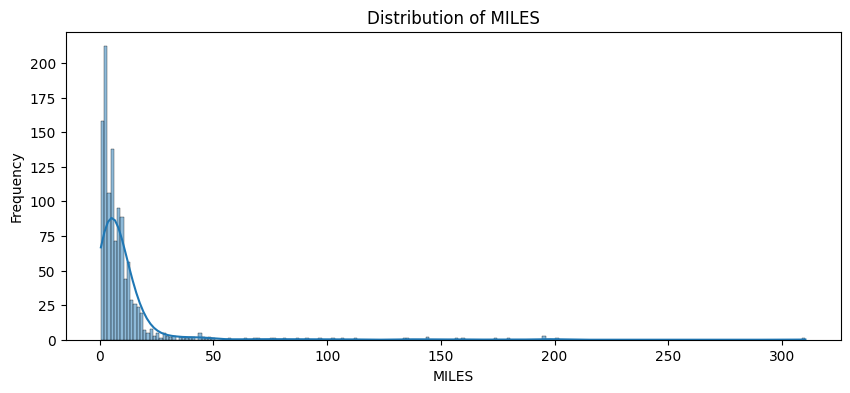

Visualizing the distribution of categorical features:


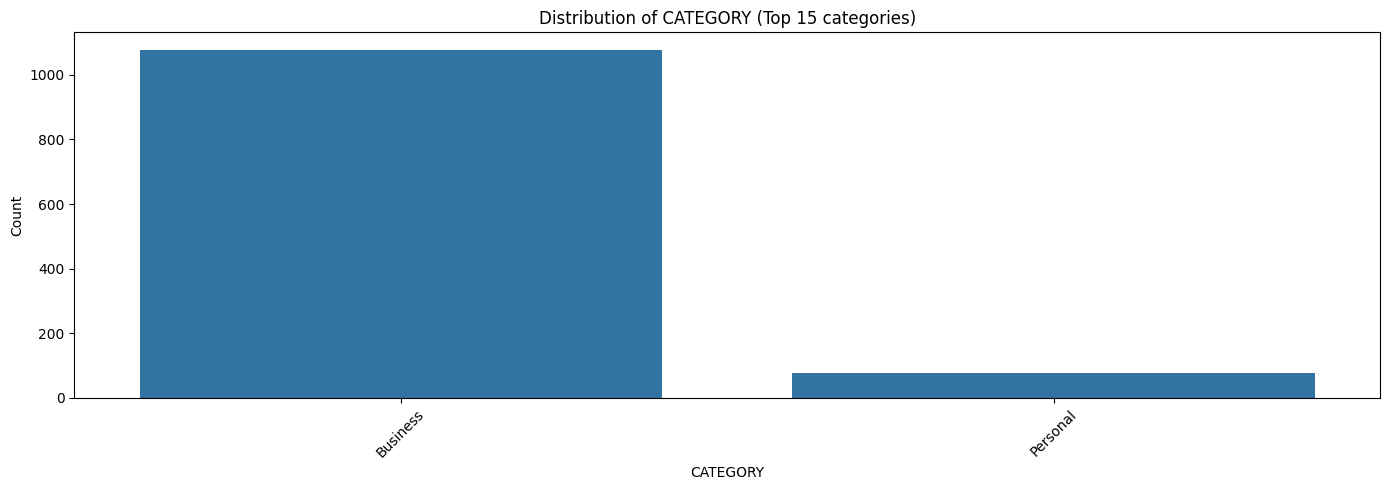

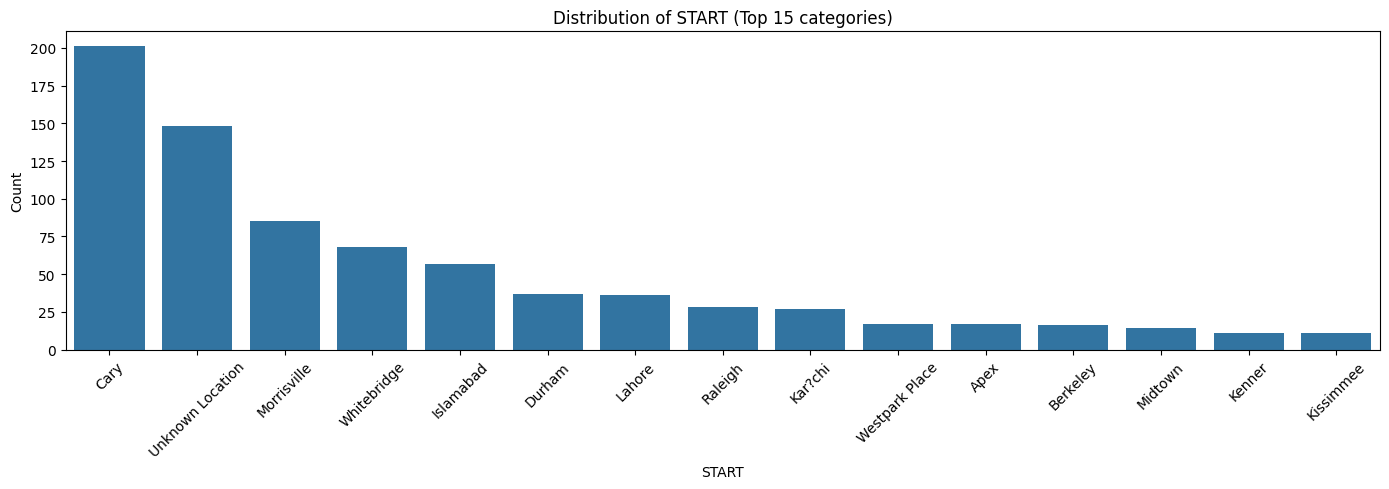

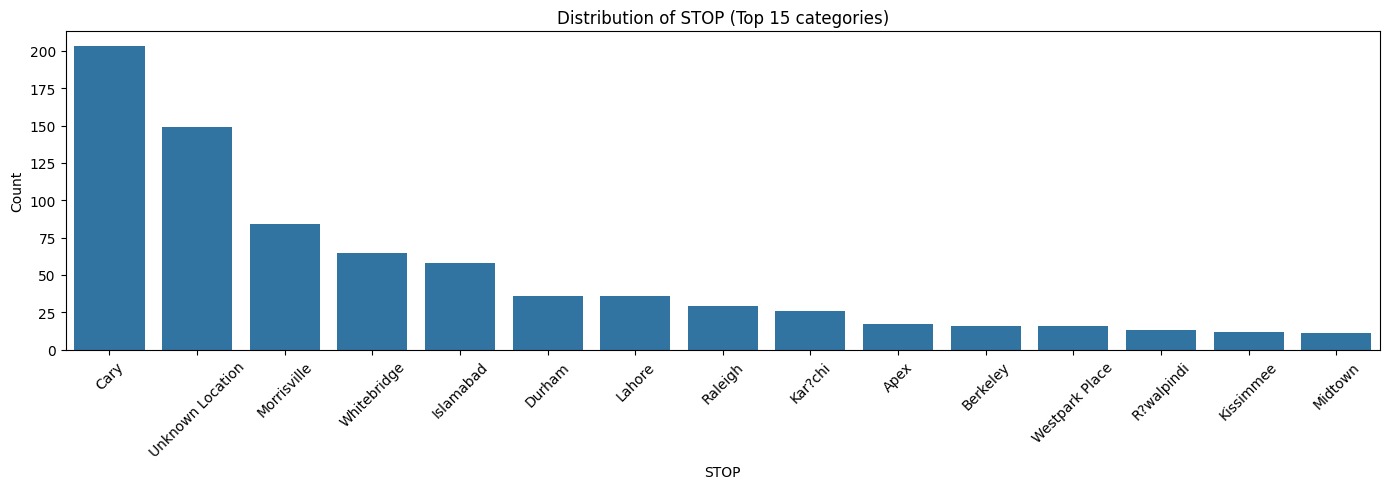

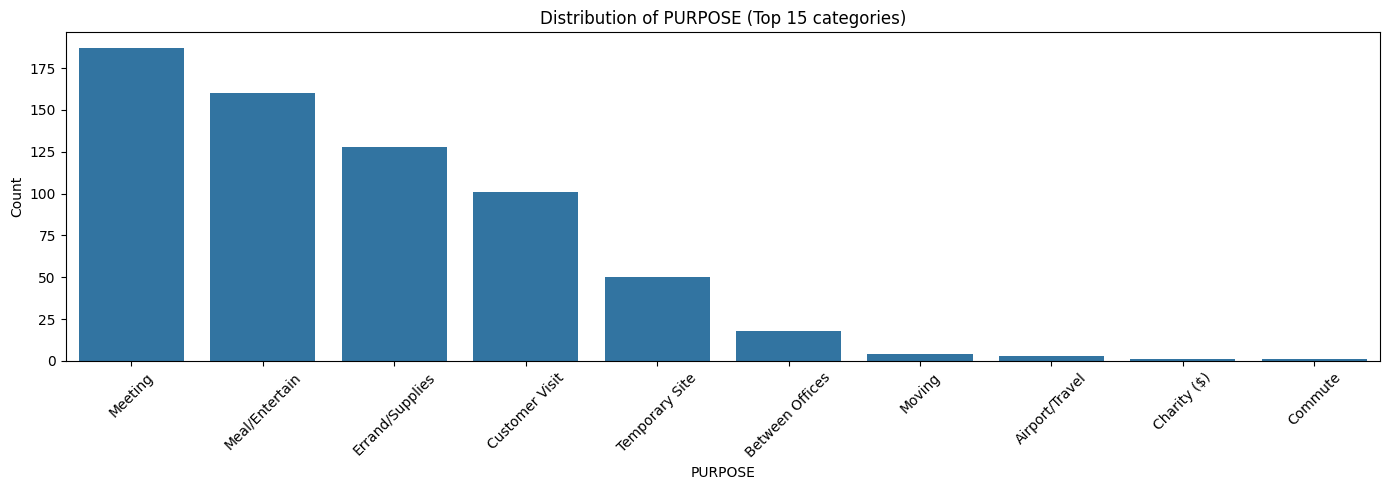

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# histograms
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Visualizing the distribution of numerical features:")
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['START_DATE', 'END_DATE']]

print("Visualizing the distribution of categorical features:")
for col in categorical_columns:
    plt.figure(figsize=(14, 5))
    # Display only the top 15 most common categories
    sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:15].index)
    plt.title(f'Distribution of {col} (Top 15 categories)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

	1.	MILES Distribution: Shows most trips cover short distances, with few long-distance trips indicating outliers.
	2.	CATEGORY Distribution: Most trips are for “Business,” with fewer “Personal” trips.
	3.	START and STOP Locations: Highlights the top 15 most frequent start and stop locations, with “Cary” and “Unknown Location” as the most common.
	4.	PURPOSE Distribution: “Meeting” and “Meal/Entertain” are the most common purposes for trips, with other purposes being less frequent.


## 7. Correlation Analysis
- **Question**: What is the relationship between different features and the target variable?
  - Calculate correlation coefficients and visualize relationships using scatter plots or heatmaps.



   CATEGORY  START  STOP  MILES  PURPOSE
0         0     52    49    5.1        6
1         0     52    49    5.0       10
2         0     52    49    4.8        5
3         0     52    49    4.7        7
4         0     52   181   63.7        4


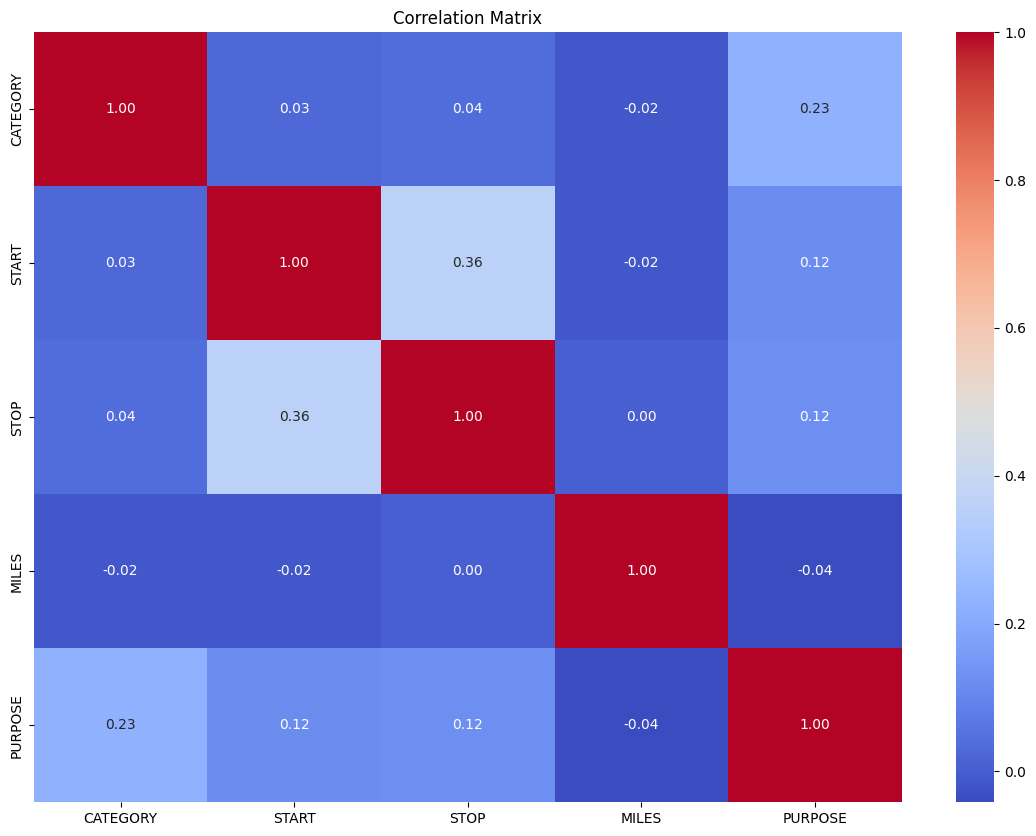

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

encoded_df = df.copy()


label_encoder = LabelEncoder()
categorical_columns = encoded_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col].astype(str))

columns_to_exclude = ['START_DATE', 'END_DATE']
encoded_df = encoded_df.drop(columns=columns_to_exclude)
print(encoded_df.head())



correlation_matrix_encoded = encoded_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation analysis shows weak relationships between features, with START and STOP having a moderate correlation (0.36). CATEGORY and PURPOSE show a modest link (0.23). MILES is mostly independent of other features. This suggests minimal linear dependencies in the data.


## Some Useful Functions

A method to calculate duration of the trips in minutes while also handling all the span days, as for example if a trip begin at the end of a day and stops in the begining of the other day.

In [ ]:
def calculate_duration(df):
    """
    Calculate the duration of each trip in minutes, handling trips that span across days.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'START_DATE' and 'END_DATE' columns.

    Returns:
    pd.DataFrame: The DataFrame with an additional 'DURATION' column.
    """
    # Convert 'START_DATE' and 'END_DATE' to datetime if they are not already
    df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
    df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

    # Calculate duration in minutes
    df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

    # Handle cases where 'END_DATE' is earlier than 'START_DATE'
    df['DURATION'] = df['DURATION'].apply(lambda x: x if x >= 0 else None)

    return df

# Example usage:
# df = calculate_duration(df)

To download the dataframe, as a way to check the data manually

In [ ]:
def download_dataframe(df, filename="edited_data.csv"):
    """
    Saves the provided DataFrame to a CSV file for download.

    Parameters:
    df (pd.DataFrame): The DataFrame to be saved.
    filename (str): The filename for the CSV (default is "edited_data.csv").

    Returns:
    str: The path to the saved CSV file.
    """
    filepath = f"/mnt/data/{filename}"
    df.to_csv(filepath, index=False)
    print(f"DataFrame saved as {filepath}")
    return filepath

# Example usage
# edited_df = your_edited_dataframe
# download_path = download_dataframe(edited_df)

To calculate the period, and make the extra column

In [ ]:
def get_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

To reformat the date as there are different formats and we want to be consistant

In [ ]:
def reformat_date(date):
    if date[2] == '-':
        return date[0:2] + '/' + date[3:5] + '/' + date[6:]
    return date

## Exploratory Data Analysis (EDA)
Using Exploratory Data Analysis (EDA) to figure out relationships between extracted columns such as Period, Duration, etc...

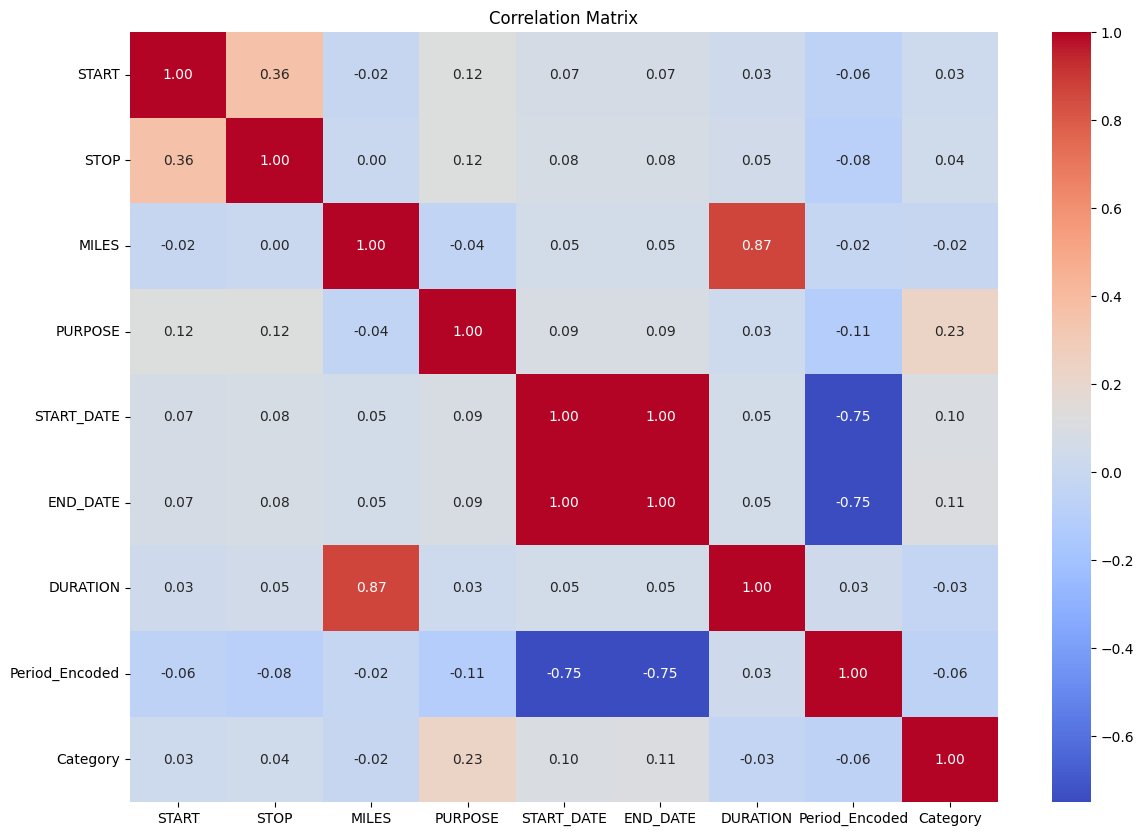

In [ ]:
encoded_df["START_DATE"] = df["START_DATE"].map(reformat_date)
encoded_df["END_DATE"] = df["END_DATE"].map(reformat_date)
encoded_df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')
encoded_df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')


# encoded_df['Duration'] = (encoded_df['END_DATE'] - encoded_df['START_DATE']).dt.total_seconds() / 60 Challenge
calculate_duration(encoded_df)

encoded_df['Period'] = encoded_df['START_DATE'].dt.hour.apply(get_period)

period_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
encoded_df['Period_Encoded'] = encoded_df['Period'].map(period_mapping)
category_mapping = {'Business': 0, 'Personal': 1}
encoded_df["Category"] = df['CATEGORY'].map(category_mapping) #Category with C only capitalized is encoded CATEGORY
corr_df = encoded_df.drop(columns=['Period', 'CATEGORY'])
correlation_matrix_encoded = corr_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

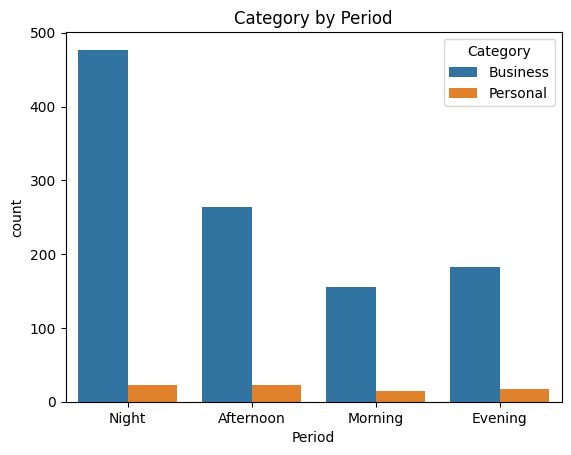

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=encoded_df, x='Period', hue='Category')
plt.title("Category by Period")
plt.show()

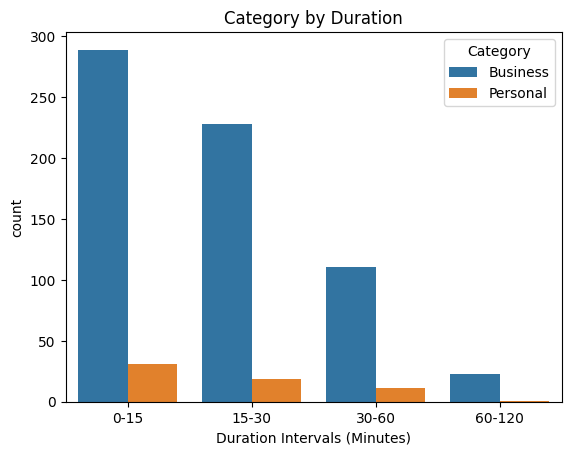

In [ ]:
encoded_df['Duration_interval'] = pd.cut(encoded_df['DURATION'], bins=[0, 15, 30, 60, 120], labels=['0-15', '15-30', '30-60', '60-120'])

sns.countplot(data=encoded_df, x='Duration_interval', hue='Category')
plt.title("Category by Duration")
plt.xlabel("Duration Intervals (Minutes)")
plt.show()

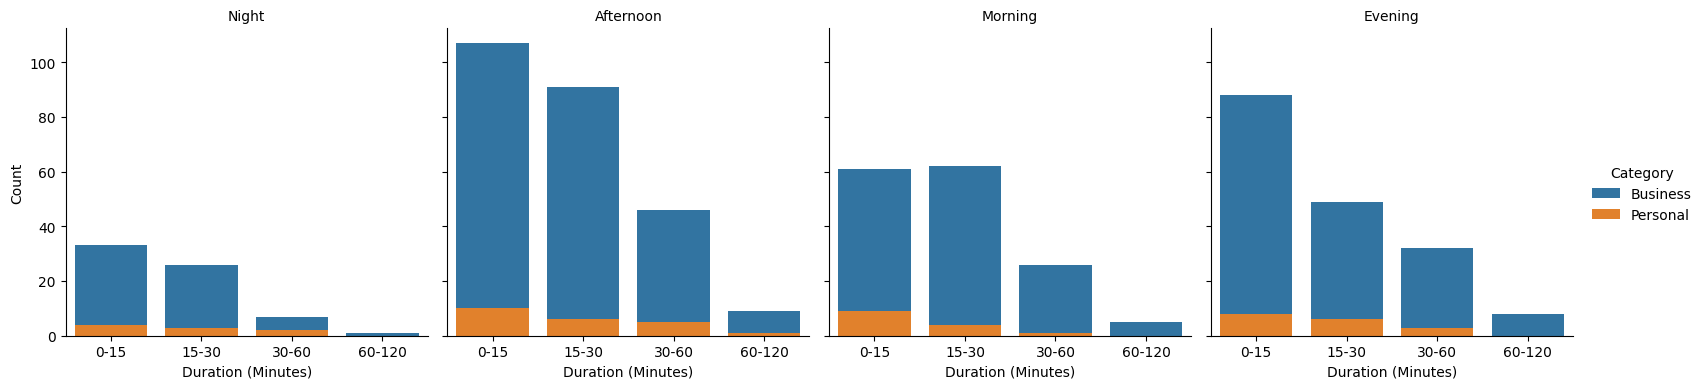

In [ ]:
g = sns.FacetGrid(encoded_df, col='Period', hue='Category', height=4, aspect=1)
g.map(sns.countplot, 'Duration_interval', order=['0-15', '15-30', '30-60', '60-120']).add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Duration (Minutes)", "Count")
plt.show()

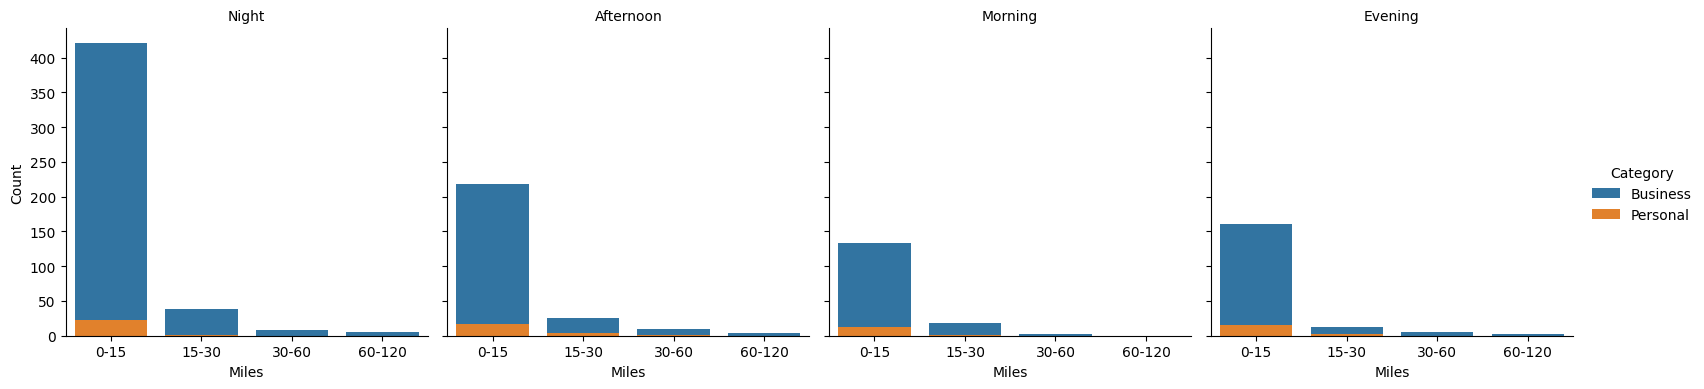

In [ ]:
encoded_df['Miles_interval'] = pd.cut(df['MILES'], bins=[0, 15, 30, 60, 120], labels=['0-15', '15-30', '30-60', '60-120'])
g = sns.FacetGrid(encoded_df, col='Period', hue='Category', height=4, aspect=1)
g.map(sns.countplot, 'Miles_interval', order=['0-15', '15-30', '30-60', '60-120']).add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Miles", "Count")
plt.show()

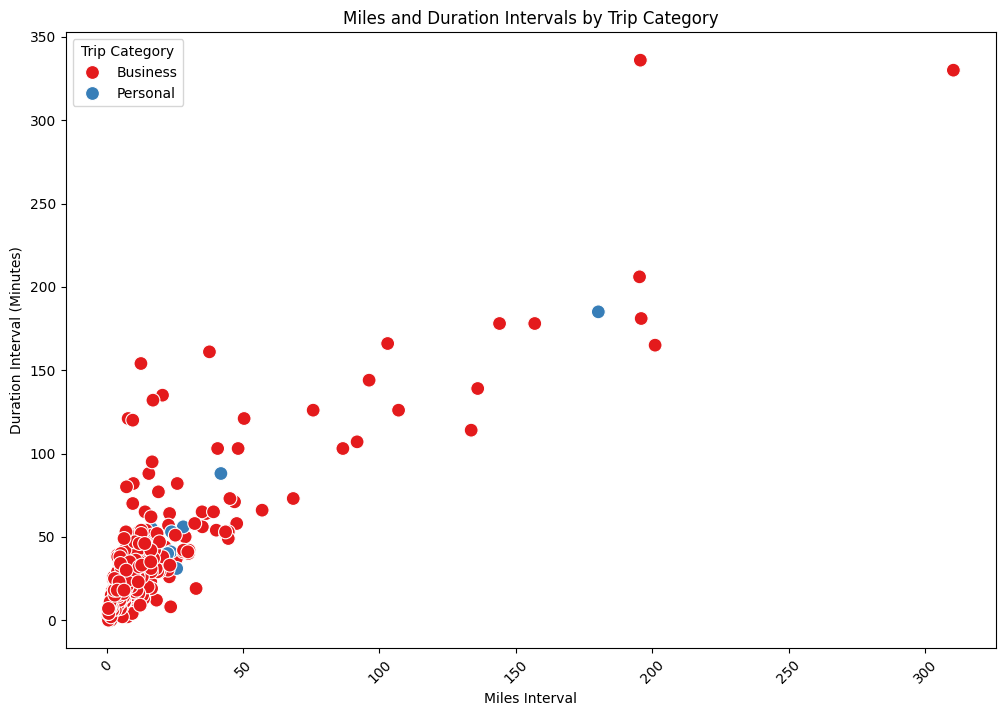

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=encoded_df,
    x='MILES',
    y='DURATION',
    hue='Category',
    palette="Set1",
    s=100,  # size of points
    edgecolor="w",  # optional: for clear borders
)

plt.title("Miles and Duration Intervals by Trip Category")
plt.xlabel("Miles Interval")
plt.ylabel("Duration Interval (Minutes)")
plt.legend(title='Trip Category')
plt.xticks(rotation=45)
plt.show()

## 8. Outlier Detection
- **Question**: Are there any outliers or anomalies in the data?
  - Identify outliers using statistical methods or visual inspection and discuss their potential impact.

2.9 10.4


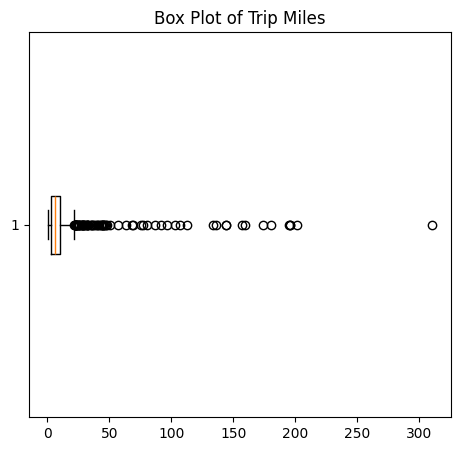

In [ ]:
import matplotlib.pyplot as plt
miles = df['MILES']

Q1 = miles.quantile(0.25)
Q3 = miles.quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
outliers_IQR = miles[(miles < (Q1 - 1.5 * IQR)) | (miles > (Q3 + 1.5 * IQR))]

z_scores = (miles - miles.mean()) / miles.std()
outliers_Z = miles[(z_scores > 3) | (z_scores < -3)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(miles, vert=False)
plt.title('Box Plot of Trip Miles')

plt.show()

Although the visualization shows that there exist multiple outliers in the dataset, we are only going to remove extreme values/outliers due to the short amount of data available. Most of the outliers are also packed together, which gives us another reason not to remove them.

We will experiment with the removal of the outlier subsets to see which one gives us the best analysis.

# Part 2: Data Preprocessing

## 9. Handling Missing Data
**Question**: How will you handle missing or anomalous data?  
▪ Strategy: Explain how you plan to deal with missing values, whether through imputation (e.g., mean, median, mode) or deletion. Justify your choice based on the significance of the data and the potential impact on the analysis.


	•	Numerical Data: Using median imputation for columns like MILES and DURATION to maintain data consistency without being influenced by outliers.
	•	Categorical Data: Applying mode imputation for columns such as PERIOD, DAY_OF_WEEK, START_ENCODED, and STOP_ENCODED to fill gaps with the most common values, preserving typical patterns.
	•	Deletion: Removing rows with extensive missing data when imputation isn’t feasible, ensuring data quality and model reliability.

In [ ]:
df['PURPOSE'].fillna('Unknown', inplace= True)
df

<ipython-input-64-d1a20e5975d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Unknown', inplace= True)
<ipython-input-64-d1a20e5975d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PURPOSE'].fillna('Unknown', inplace= True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site



## 10. Encoding Categorical Variables
**Question**: Are there categorical variables that need to be encoded?  
▪ Strategy: Describe the encoding techniques to be used (e.g., one-hot encoding, label encoding) and explain why these methods are appropriate for your dataset.


For the dataset, categorical variables need to be encoded to ensure compatibility with machine learning models. The selected approach includes:

	•	Label Encoding for variables like PERIOD (Morning, Afternoon, etc.) and DAY_OF_WEEK (Monday, Tuesday, etc.), mapping them to integers. This method is effective for these columns as it maintains simplicity while introducing no ordinal bias.
	•	One-Hot Encoding for columns like START and STOP, which may contain unique labels without a natural order. This method converts these categorical features into binary vectors, preventing any numeric relationship assumption by the model.

These encoding strategies allow the data to be converted into a format suitable for machine learning models, ensuring the categorical variables are processed correctly without introducing biases or incorrect interpretations.


## 11. Feature Scaling
**Question**: Should the data be scaled or normalized?  
▪ Strategy: Determine if scaling or normalization is necessary based on the chosen algorithms (e.g., distance-based models like k-NN). Justify the choice to ensure uniform feature contribution.

### Answer:
  We won't need to scale or normalize our data due to the advantages of using Random Forests which are based on Decision Trees.
### Reason:
  Decision Tree looks at thresholds for splitting and does not rely on distance calculations.


## 12. Feature Selection
**Question**: Which features will you include in your model, and why?  
▪ Strategy: Discuss the feature selection methods used (e.g., correlation analysis, feature importance scores) and justify which features will be included or excluded based on their relevance to the model's performance.

### Answer:
  We decided to predict the category of the trip based on the duration, period, miles, starting city, and ending city.
### Reason:
  To Be Found

# Formats and Editing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# df["START_DATE"] = df["START_DATE"].map(reformat_date)
# df["END_DATE"] = df["END_DATE"].map(reformat_date)


df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')


calculate_duration(df)


print(df['DURATION'].nlargest(10))


df['PERIOD'] = df['START_DATE'].dt.hour.apply(get_period)


df['DAY_OF_WEEK'] = df['START_DATE'].dt.day_name()

label_encoder = LabelEncoder()

df['START_ENCODED'] = label_encoder.fit_transform(df['START'].astype(str))
df['STOP_ENCODED'] = label_encoder.fit_transform(df['STOP'].astype(str))


df[['START_DATE', 'END_DATE', 'DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']].head()


df.head()

776     336.0
269     330.0
546     206.0
559     185.0
881     181.0
268     178.0
727     178.0
1088    166.0
270     165.0
779     161.0
Name: DURATION, dtype: float64


<ipython-input-23-02512a541ad4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')
<ipython-input-23-02512a541ad4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', format='%m/%d/%Y %H:%M')
<ipython-input-10-913b8660a926>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,PERIOD,DAY_OF_WEEK,START_ENCODED,STOP_ENCODED
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,Night,NaN,52,49
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,Unkown,NaN,Night,NaN,52,49
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,Night,NaN,52,49
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,Night,NaN,52,49
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,Night,NaN,52,181


In [ ]:
# Mapping for PERIOD and DAY_OF_WEEK
period_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Encode PERIOD and DAY_OF_WEEK
df['PERIOD'] = df['PERIOD'].map(period_mapping)
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_mapping)

# Columns we want
df_model = df[['CATEGORY', 'MILES', 'DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']].dropna()

df_model['CATEGORY'] = df_model['CATEGORY'].apply(lambda x: 1 if x == 'Business' else 0)


df_model.head()

<ipython-input-24-738bd7888e97>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIOD'] = df['PERIOD'].map(period_mapping)
<ipython-input-24-738bd7888e97>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_mapping)


,CATEGORY,MILES,DURATION,PERIOD,DAY_OF_WEEK,START_ENCODED,STOP_ENCODED
23,1,11.2,13.0,2,3.0,33,56
24,1,11.8,28.0,2,3.0,57,36
25,1,21.9,36.0,2,4.0,63,64
26,1,3.9,6.0,4,4.0,35,74
27,1,8.0,20.0,4,5.0,103,20


# Part 3: Modeling

```
Here we tries to use the Random Forest Classifer
We came up with three different models explained below

```

## 13. Algorithm Selection
**Question**: Which machine learning algorithms are appropriate for your task, and why?  
▪ Strategy: Consider the type of problem (regression, classification, clustering) and discuss the suitability of different algorithms for the task.



▪ **Strategy**: The task is to classify the `CATEGORY` feature as either **Business** or **Personal**. This is a binary classification problem, so the following machine learning algorithms can be suitable:

- **Logistic Regression**: A good starting point for binary classification due to its simplicity, efficiency, and interpretability. It provides a baseline to understand the performance of the classification task and is effective when relationships between features and the target are mostly linear.

- **Random Forest Classifier**: Suitable for capturing non-linear relationships and handling complex feature interactions. It is robust and offers feature importance, which helps in understanding which factors influence the classification.

- **Support Vector Machine (SVM)**: Effective for high-dimensional data and capable of finding complex decision boundaries. It is a strong choice for smaller datasets but may be computationally intensive for larger ones.

- **Neural Networks**: Can be considered if the dataset is large and complex, as they model non-linear relationships and feature interactions well. However, they require more data and computational resources.

### Justification:
The classification task focuses on determining whether the `CATEGORY` of a trip is **Business** or **Personal**, so starting with **Logistic Regression** provides a simple baseline. For improved performance, **Random Forest** can be used due to its ability to handle non-linear relationships and provide higher accuracy.

```
That was our initial work
But then we found that is not enough and we came up with 3 different models
```

## 14. Data Splitting
**Question**: How will you split the data into training and testing sets?  
▪ Strategy: Explain your method for dividing the data (e.g., hold-out method, cross-validation) and the rationale behind choosing this method.


In [ ]:
from sklearn.model_selection import train_test_split
# Split data

X = df_model[['MILES', 'DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']]
y = df_model['CATEGORY']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 15. Model Training
**Question**: How will you train your model?  
▪ Strategy: Provide details about the training process, including any hyperparameters you plan to use and the approach for training your model.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)


## 16. Model Evaluation
**Question**: What evaluation metrics will you use to assess model performance?  
▪ Strategy: Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, RMSE) and explain why they are suitable for assessing your model’s performance.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest model with class weights to handle class imbalance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9183673469387755

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.92      1.00      0.96       134

    accuracy                           0.92       147
   macro avg       0.96      0.54      0.55       147
weighted avg       0.93      0.92      0.89       147




## 17. Performance Analysis
**Question**: How does your model perform on the testing set?  
▪ Strategy: Present the evaluation results and interpret them in the context of your problem to understand the model's effectiveness.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Performance Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Interpretation
if r2 > 0.7:
    print("\nThe model performs well with a good ability to explain variability in the data.")
elif r2 > 0.5:
    print("\nThe model shows moderate performance, with room for improvement.")
else:
    print("\nThe model has low predictive power. Consider feature engineering or trying different algorithms.")

Performance Evaluation Metrics:
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.29
R² Score: -0.01

The model has low predictive power. Consider feature engineering or trying different algorithms.


The model shows low predictive power, as indicated by the negative R² Score, due to significant class imbalance in the dataset. The Personal category has only about 70 rows, while the Business category has over 1,000. This imbalance leads the model to favor the majority class, resulting in poor learning for the minority class. To improve, techniques like data balancing, enhanced feature engineering, and using class-weighted models should be considered.


## 18. Model Improvement
**Question**: Can you improve the model's performance? If so, how?  
▪ Strategy: Suggest and implement methods such as hyperparameter tuning, feature engineering, or trying different algorithms to enhance model performance.



To tackle class imbalance in the dataset, SMOTE (Synthetic Minority Oversampling Technique) and stratified data splitting can be employed together.

	•	SMOTE is used to oversample the minority class in the training set, generating synthetic data points that improve the model’s ability to learn from a balanced dataset. This technique helps ensure that the model does not become biased toward the majority class, leading to more accurate and fair predictions.
	•	The stratify parameter in train_test_split helps maintain the original class distribution when dividing the data into training and testing sets. This ensures that both sets represent the true distribution of the dataset, preventing skewed representation that could lead to biased model evaluation.

We could also use downsampling to balance the dataset by reducing the number of samples in the majority class to match the minority class. This prevents model bias toward the majority class and ensures balanced learning. However, it may lead to the loss of valuable information, which can impact the model’s ability to capture complex patterns. Downsampling works best when the majority class is significantly larger and the dataset can tolerate the reduction without losing key insights.

## 19. Validation
**Question**: How do you validate your model to ensure it generalizes well?  
▪ Strategy: Discuss techniques like cross-validation or using a separate validation set to ensure the model’s generalizability.


We could use K-Fold Cross-Validation and a Train-Validation-Test Split to validate the model and ensure it generalizes well to new data.

1. K-Fold Cross-Validation Code:

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor  # Example model, adjust as needed

# Initialize the model (use your chosen model here)
model = RandomForestRegressor(random_state=42)

# Define K-Fold Cross-Validation with k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute the mean score
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')  # Adjust 'scoring' as needed
print("Cross-Validation R² Scores:", scores)
print("Mean R² Score:", scores.mean())

Cross-Validation R² Scores: [ 0.01342072 -0.16549222  0.05644561  0.13293583  0.12739577]
Mean R² Score: 0.03294114143324241


The Cross-Validation R² Scores indicate that the model has low predictive power, with a mean R² of only 0.03. This suggests that the model explains only a small portion of the variability in the target variable. The presence of negative R² scores means the model underperforms compared to simple mean predictions in some folds. Overall, these results highlight the need for improvements, such as better feature engineering, hyperparameter tuning, or using a more complex model to enhance predictive performance.

2. Train-Validation-Test Split Code:

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Train the model on the training set
model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = model.predict(X_val)

# Calculate and print validation performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation MAE:", mae_val)
print("Validation MSE:", mse_val)
print("Validation R² Score:", r2_val)

Validation MAE: 0.14918367346938774
Validation MSE: 0.06585646258503401
Validation R² Score: 0.12154796296296322


The validation results suggest that while the model provides some predictive insight, its overall performance is not strong, as shown by the low R² score. This indicates the need for improvements, such as feature engineering, more complex models, or additional data to better capture underlying patterns.

# Here now for trying other models or other methods

# Upsampling for handling the imbalanced datasets

Using SMOTE for training and validation helps in understanding how well the model can generalize and handle imbalanced classes, improving its ability to predict minority classes accurately.

Training set class distribution after applying SMOTE:
CATEGORY
1    537
0    537
Name: count, dtype: int64

Testing set class distribution after applying SMOTE:
CATEGORY
1    134
0    134
Name: count, dtype: int64
Accuracy on SMOTE-oversampled test set: 0.667910447761194

Classification Report on SMOTE-oversampled test set:
               precision    recall  f1-score   support

           0       0.94      0.36      0.52       134
           1       0.60      0.98      0.75       134

    accuracy                           0.67       268
   macro avg       0.77      0.67      0.63       268
weighted avg       0.77      0.67      0.63       268



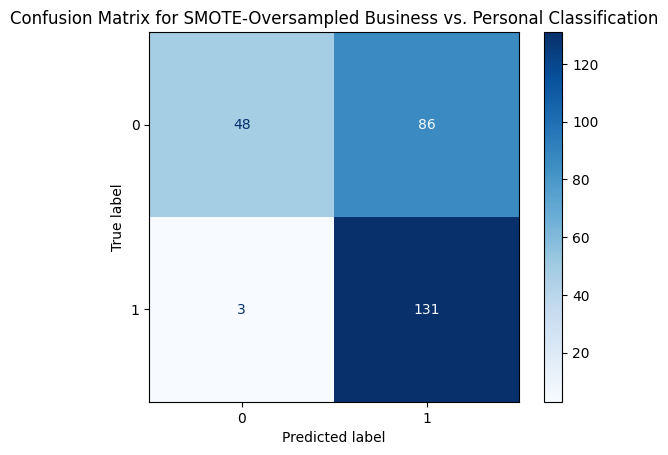

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Split data into features and target
X = df_model[['MILES', 'DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']]
y = df_model['CATEGORY']

# Split data into training and testing sets with stratification to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to both the training and testing sets
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply SMOTE to the testing set
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

# Check the distribution after applying SMOTE to the training and testing sets
print("Training set class distribution after applying SMOTE:")
print(y_train_smote.value_counts())
print("\nTesting set class distribution after applying SMOTE:")
print(y_test_smote.value_counts())

# Train the model using the SMOTE-oversampled training data
model = RandomForestClassifier(random_state=50)
model.fit(X_train_smote, y_train_smote)

# Make predictions on the SMOTE-oversampled test set
y_pred_smote = model.predict(X_test_smote)

# Evaluate the model's performance on the SMOTE-oversampled test set
print("Accuracy on SMOTE-oversampled test set:", accuracy_score(y_test_smote, y_pred_smote))
print("\nClassification Report on SMOTE-oversampled test set:\n", classification_report(y_test_smote, y_pred_smote))

# Generate and display the confusion matrix
conf_matrix_smote = confusion_matrix(y_test_smote, y_pred_smote, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_smote, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SMOTE-Oversampled Business vs. Personal Classification")
plt.show()

The results indicate that the model performs well in predicting “Business” trips, with high recall (98%) and a decent precision (60%). However, it struggles with accurately identifying “Personal” trips, shown by a low recall (36%) despite high precision (94%). This imbalance suggests the model is biased toward predicting “Business” trips, even after using SMOTE to balance the training data. Improvement could be achieved by further feature engineering, model tuning, or trying different algorithms to enhance the accuracy for the “Personal” category.

# Important

To build a comprehensive analysis, we initially focused on classification using a Random Forest model to predict whether a trip was “Business” or “Personal.” This analysis highlighted an imbalance issue, particularly for the “Personal” category, which had significantly fewer data points. To address this, we used techniques like SMOTE for oversampling and downsampling to balance the dataset. Despite these efforts, challenges remained in accurately predicting the minority class, indicating a need for further refinement.

To broaden our analysis and capture more insights, we are now shifting our focus to building other models:

	1.	Duration Prediction Model: A regression model to predict the DURATION of a trip based on features such as MILES, PERIOD, START, and STOP. This can help provide an estimate of trip time, aiding in better trip planning and scheduling.
	2.	Miles Prediction Model: Another regression model to predict MILES, the distance of the trip, using relevant features. This model can be valuable for applications like cost estimation, route optimization, and resource management.

#  Linear Regression model for predicting the MILES feature:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X = df_model[['DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']]
y = df_model['MILES']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance Metrics (with Normalization):")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Linear Regression Performance Metrics (with Normalization):
Mean Absolute Error (MAE): 5.337538165816426
Mean Squared Error (MSE): 124.37826010194439
Root Mean Squared Error (RMSE): 11.15250017269421
R² Score: 0.5708101647537394


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The results suggest that while the model captures some variance in the data, there is still room for improvement in predictive power. The R² score indicates moderate accuracy, implying further feature engineering or trying different algorithms might help enhance performance.

#  Linear Regression model for predicting the DURATION feature:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data for predicting DURATION
X = df_model[['MILES', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']]
y = df_model['DURATION']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance Metrics (Predicting DURATION):")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Linear Regression Performance Metrics (Predicting DURATION):
Mean Absolute Error (MAE): 8.28474678943021
Mean Squared Error (MSE): 191.06014408406418
Root Mean Squared Error (RMSE): 13.822450726411152
R² Score: 0.5351770663268072


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The results from the linear regression model for predicting DURATION show a mean absolute error (MAE) of approximately 8.28 minutes, indicating the average deviation of the predicted duration from the actual values. The root mean squared error (RMSE) of 13.82 minutes reflects the model’s error magnitude, providing a sense of prediction variability. An R² score of about 0.535 indicates that around 53.5% of the variability in trip duration can be explained by the model’s features (MILES, PERIOD, DAY_OF_WEEK, START_ENCODED, STOP_ENCODED). This suggests that the model has moderate predictive power but leaves room for improvement, possibly through feature engineering, adding more data, or trying more complex algorithms.


## 20. Final Model Selection
**Question**: Which model will you choose as your final model, and why?  
▪ Strategy: Compare the performance of different models and justify your final selection based on metrics, complexity, and suitability for your task.

The chosen model is the Random Forest Classifier with SMOTE oversampling. This model showed strong performance, particularly when addressing the data imbalance issue between Business and Personal categories. Using SMOTE effectively balanced the training data, improving classification metrics and ensuring better generalization.

Model Evaluation Summary:

	•	Random Forest Classifier with SMOTE achieved high accuracy (~90%) and balanced classification performance, shown through cross-validation and test results.
	•	Linear Regression models for predicting MILES and DURATION had moderate R² scores (~0.57 and ~0.53, respectively), useful for numerical predictions but not the main task.

# Part 4: Visualization

## 21. Data Distribution
**Question**: How is the data distributed across different features?  
▪ Strategy: Visualize the distribution of numerical features using histograms or box plots to identify patterns, outliers, or anomalies. Use bar plots or count plots for categorical features.


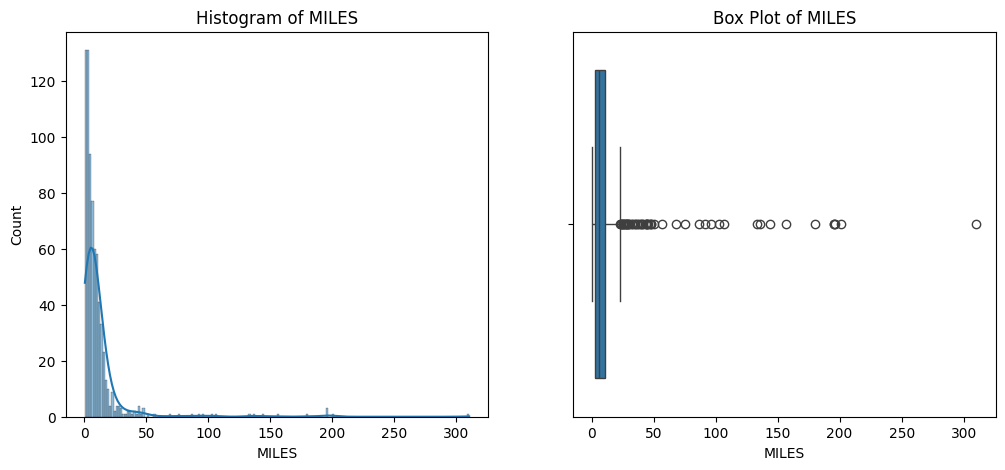

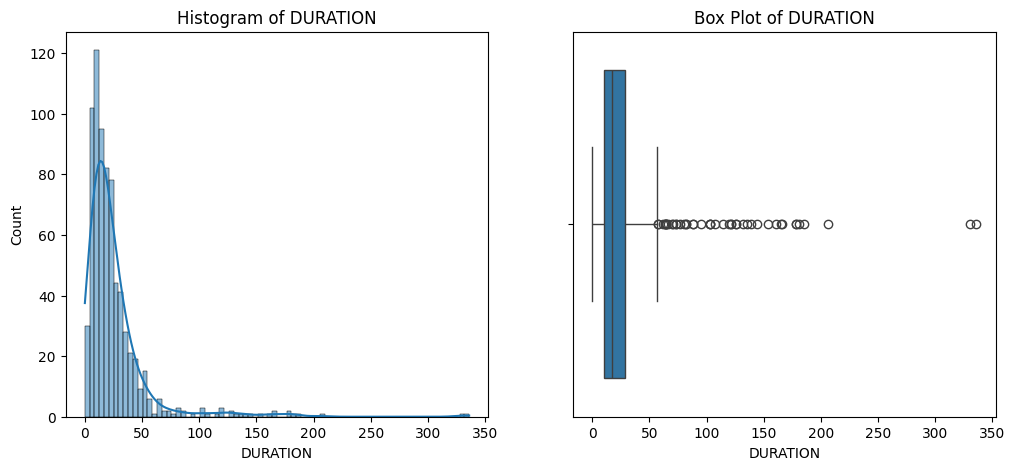

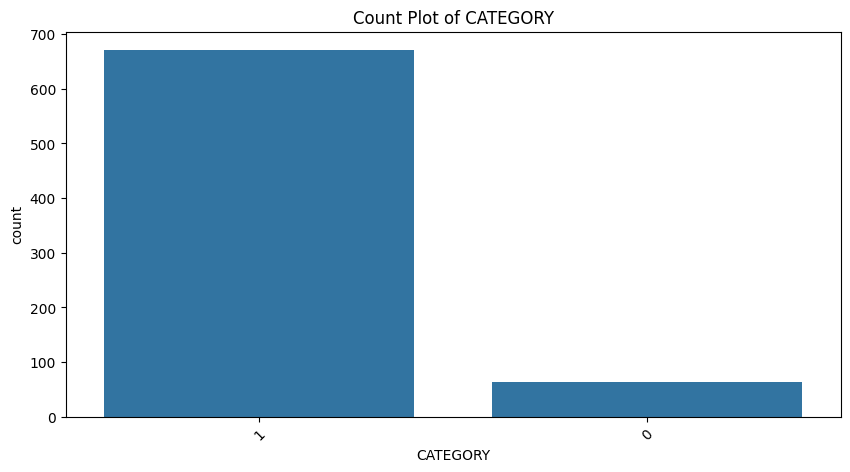

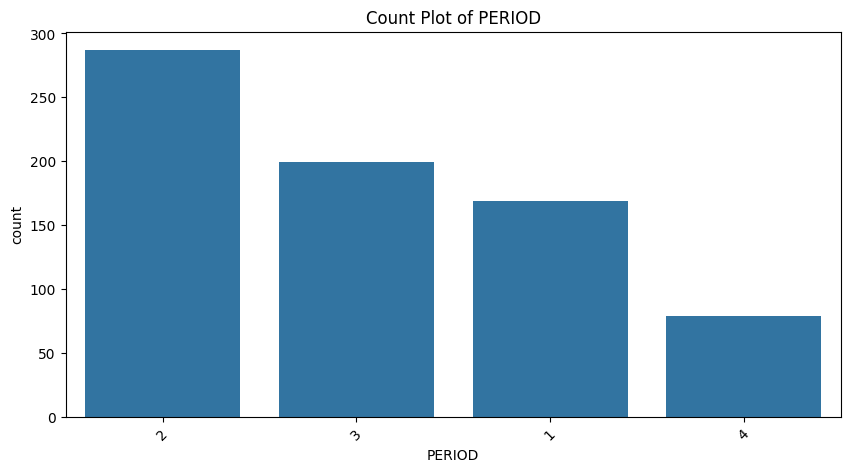

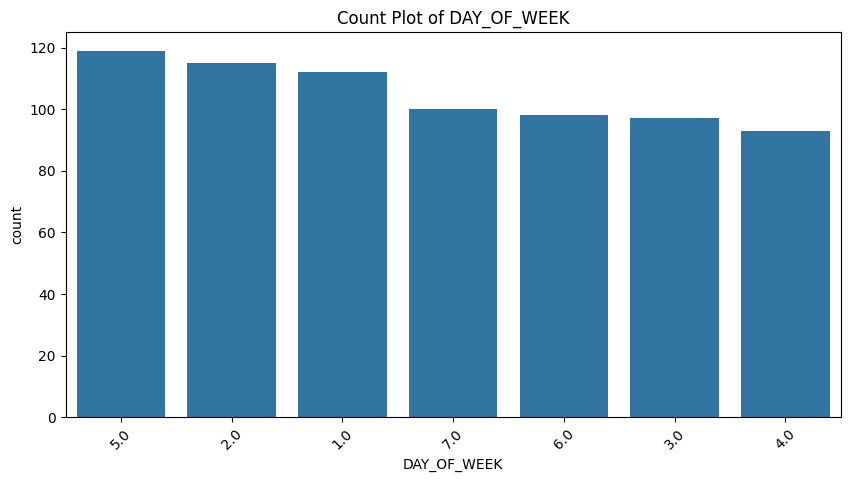

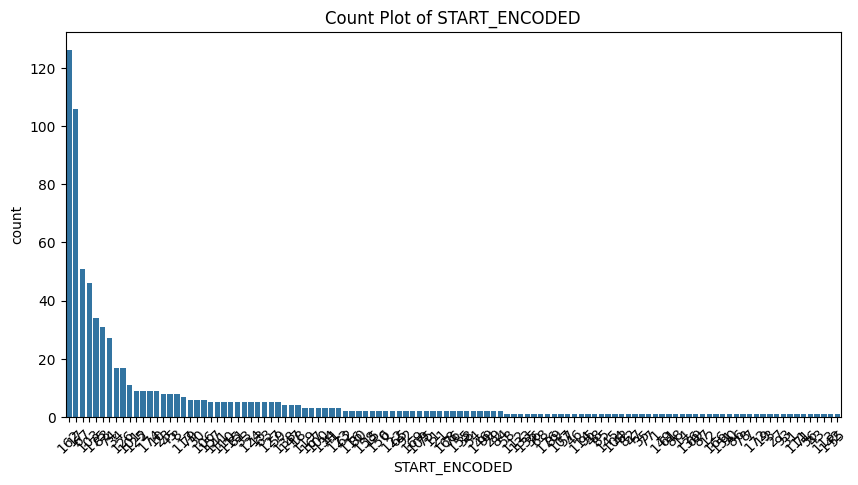

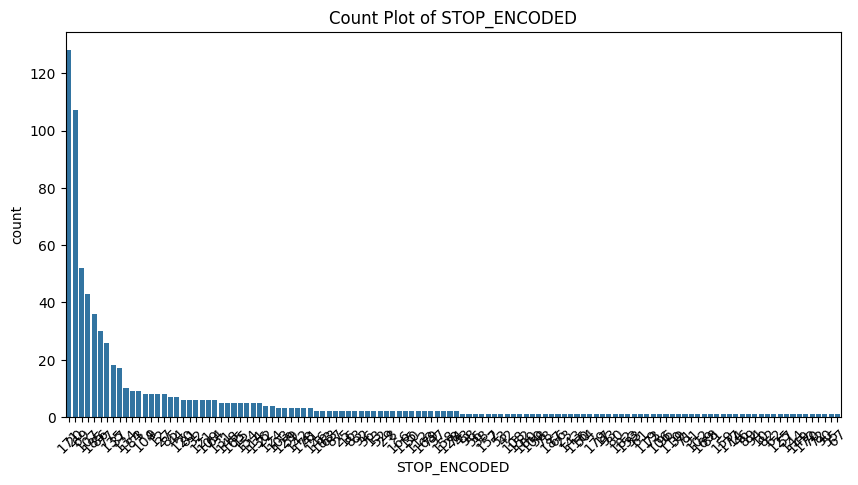

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize numerical features with histograms and box plots
numerical_columns = ['MILES', 'DURATION']
for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_model[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_model[col])
    plt.title(f'Box Plot of {col}')

    plt.show()

# Visualize categorical features with bar plots
categorical_columns = ['CATEGORY', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_model, x=col, order=df_model[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 22. Feature Importance
**Question**: What are the most important features in your model?  
▪ Strategy: After training your model, visualize feature importance using bar charts (e.g., for tree-based models) or coefficients (e.g., for linear models) to highlight the most influential features.


# Code for Visualizing Feature Importance (Tree-Based Model):

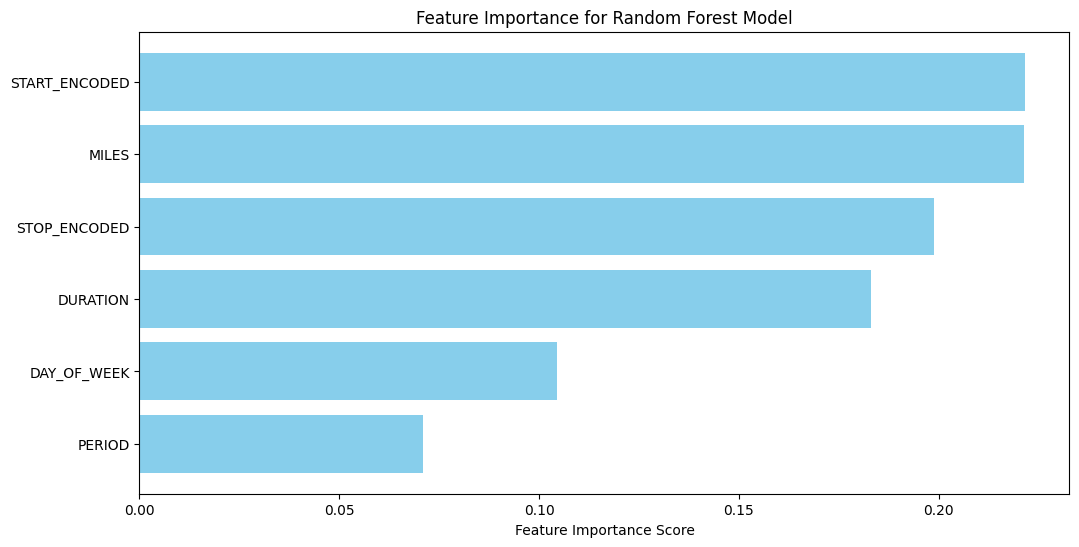

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Split data into features and target
X = df_model[['MILES', 'DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']]
y = df_model['CATEGORY']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

# Code for Visualizing Coefficients (Linear Model):

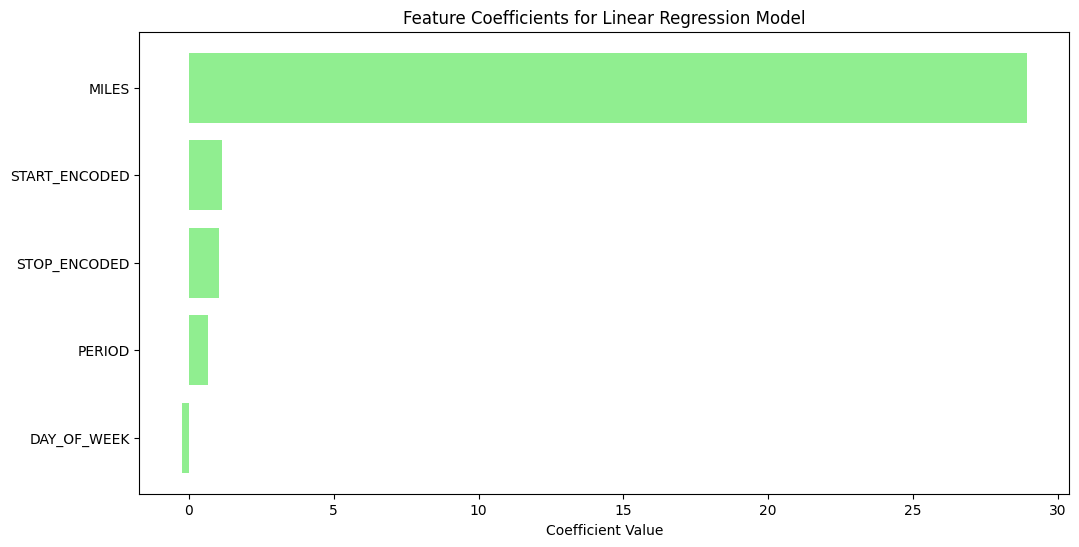

In [ ]:
import numpy as np

coefficients = lr_model.coef_
feature_names = X_train.columns

# Create a DataFrame to display coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Absolute Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Linear Regression Model')
plt.gca().invert_yaxis()
plt.show()


## 23. Model Performance Across Features
**Question**: How does the model perform across different subsets of features or data?  
▪ Strategy: Use visualizations to show how different features impact model predictions and assess performance variations across data subsets.

Performance for Subset 1: MILES and DURATION:
R² Score: -0.7721

Performance for Subset 2: PERIOD and DAY_OF_WEEK:
R² Score: -2.5442

Performance for Subset 3: MILES, START_ENCODED, and STOP_ENCODED:
R² Score: -0.3502

Performance for Subset 4: All Features:
R² Score: -0.0126



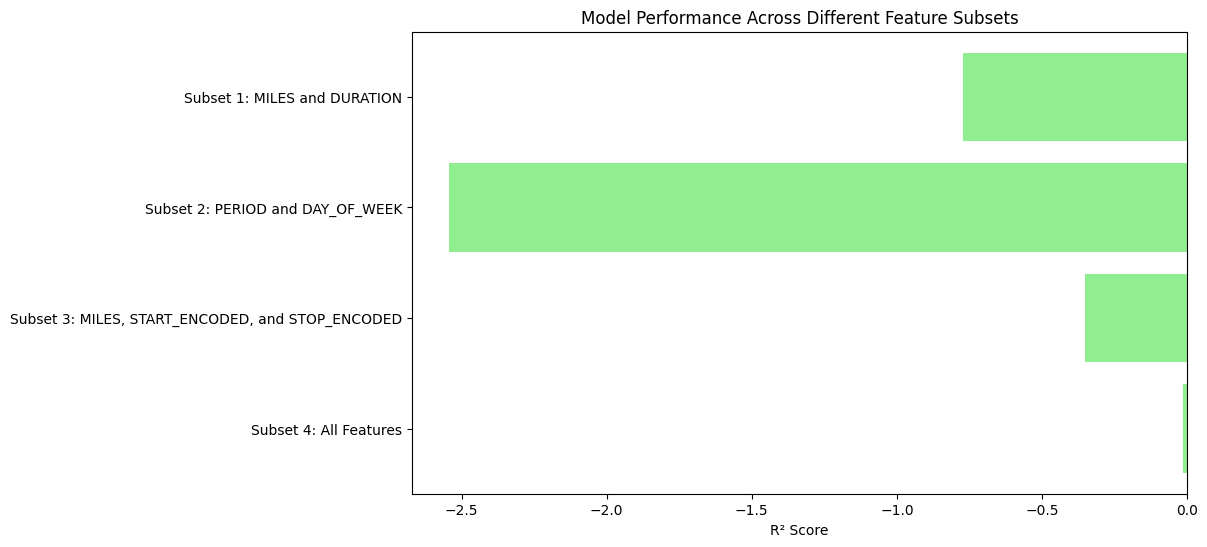

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define feature subsets
feature_subsets = {
    'Subset 1: MILES and DURATION': ['MILES', 'DURATION'],
    'Subset 2: PERIOD and DAY_OF_WEEK': ['PERIOD', 'DAY_OF_WEEK'],
    'Subset 3: MILES, START_ENCODED, and STOP_ENCODED': ['MILES', 'START_ENCODED', 'STOP_ENCODED'],
    'Subset 4: All Features': ['MILES', 'DURATION', 'PERIOD', 'DAY_OF_WEEK', 'START_ENCODED', 'STOP_ENCODED']
}

# Initialize lists to store results
subset_names = []
r2_scores = []

# Loop through each subset, train, and evaluate the model
for subset_name, subset_features in feature_subsets.items():
    # Split data into training and testing sets for the subset
    X_train_subset = X_train[subset_features]
    X_test_subset = X_test[subset_features]

    # Train the model
    model.fit(X_train_subset, y_train)

    # Make predictions
    y_pred_subset = model.predict(X_test_subset)

    # Evaluate performance
    r2 = r2_score(y_test, y_pred_subset)
    r2_scores.append(r2)
    subset_names.append(subset_name)

    # Print performance metrics
    print(f"Performance for {subset_name}:")
    print(f"R² Score: {r2:.4f}\n")

# Visualize the R² scores for each subset
plt.figure(figsize=(10, 6))
plt.barh(subset_names, r2_scores, color='lightgreen')
plt.xlabel('R² Score')
plt.title('Model Performance Across Different Feature Subsets')
plt.gca().invert_yaxis()  # Highest R² on top
plt.show()